In [1]:
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt
import torch
import gymnasium as gym
import gym_bart
from plotting_utils import (
    set_rc, 
    add_abc_to_subaxes, 
    colors, 
    rgb_colors
)
from model_evaluation import forced_action_evaluate
from model_evaluation import bart_toggle_data_callback, meta_bart_callback
from bart_behavior_analysis import (
    color_to_idx, 
    idx_to_color, 
    bart_plot_colors,
    plot_bart_behaviors,
    get_bart_res_eps,
    get_meta_mean_diffs,
    get_meta_fixed_mean_diff,
    plot_3color_it_rt,
    plot_3color_meta_ep,
    plot_meta_it_progression,
)
from read_experiments import average_runs, load_exp_df

from functools import partial
import sys
sys.path.append('../')
from ppo.envs import make_vec_env

set_rc()
evalu = partial(forced_action_evaluate, data_callback=bart_toggle_data_callback,
                env_name="BartEnv-v0", num_episodes=100)

In [10]:
model, (obs_rms, ret_rms) = torch.load('../saved_checkpoints/behav/behav_t0/50.pt')

In [11]:
res = evalu(model, obs_rms, num_episodes=1000, deterministic=False)
colors = np.array(res['data']['color'])
end_size = np.array(res['data']['end_size'])
popped = np.array(res['data']['popped'])
reaction_times = np.array(res['data']['inflate_delay'])

SubplotGrid(nrows=3, ncols=3, length=9)

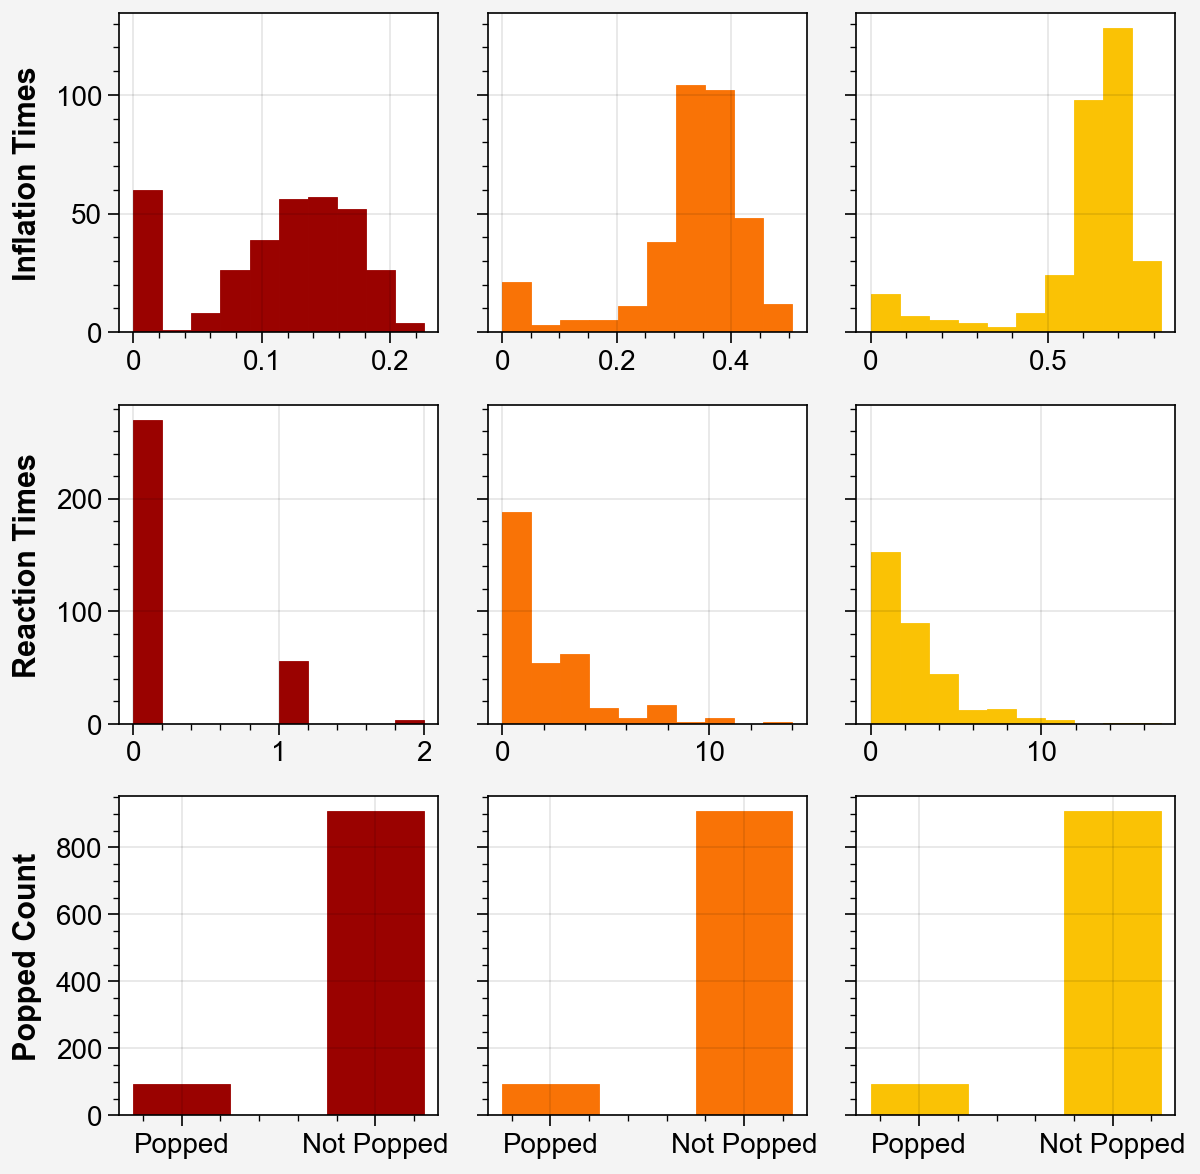

In [92]:
model, (obs_rms, ret_rms) = torch.load('../saved_checkpoints/behav/behav_t0/20.pt')
res = evalu(model, obs_rms, num_episodes=1000, deterministic=False)
plot_3color_it_rt(res, metrics=['size', 'rt', 'popped'])

SubplotGrid(nrows=2, ncols=3, length=6)

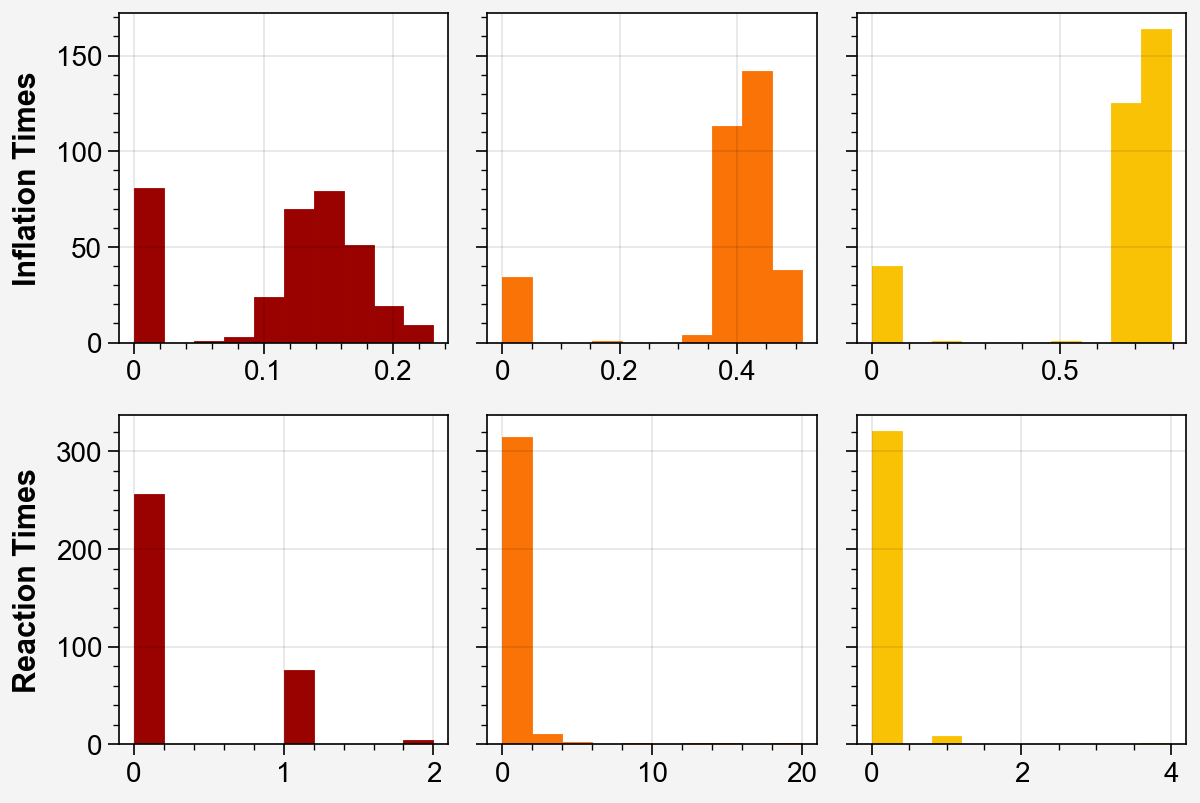

In [4]:
model, (obs_rms, ret_rms) = torch.load('../saved_checkpoints/behav/behav_t0/100.pt')
res = evalu(model, obs_rms, num_episodes=1000, deterministic=False)
plot_3color_it_rt(res)

SubplotGrid(nrows=3, ncols=3, length=9)

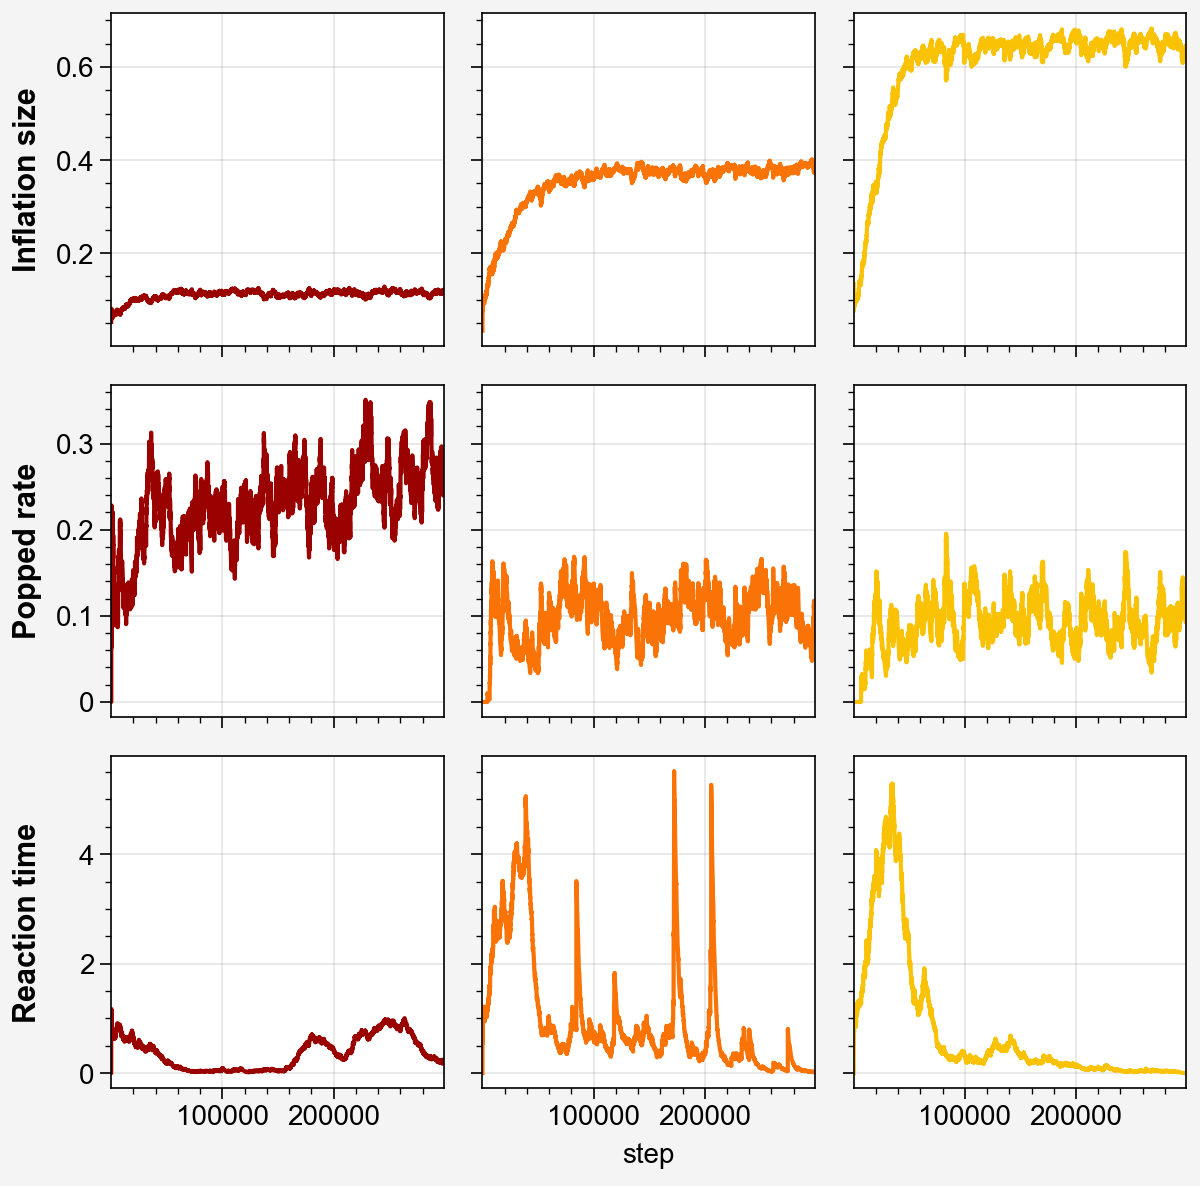

In [70]:
df = load_exp_df('behav/behav', trial_num=0)
plot_bart_behaviors(df, metrics=['size', 'popped', 'rt'])

In [95]:
fres = get_bart_res_eps(res, color=['red'], min_rt=2)
len(fres['obs'])

3

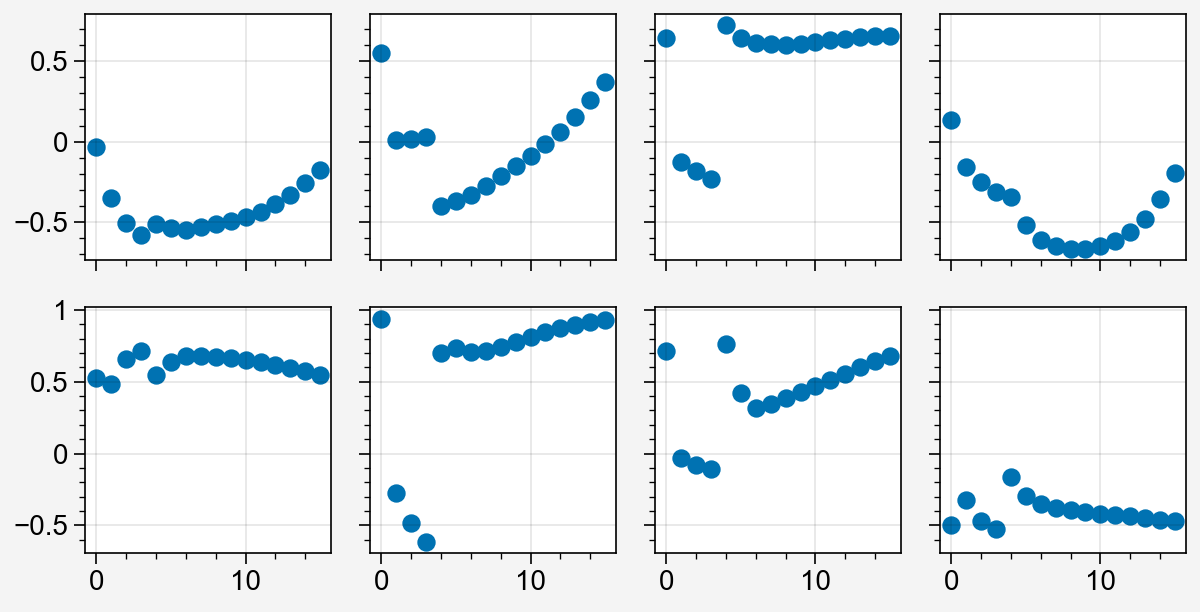

In [66]:
fig, ax = pplt.subplots(nrows=2, ncols=4, figwidth=6)
ep = 2
rnn_hxs = fres['rnn_hxs'][ep]
for i in range(8):
    ax[i].scatter(rnn_hxs[:, i])

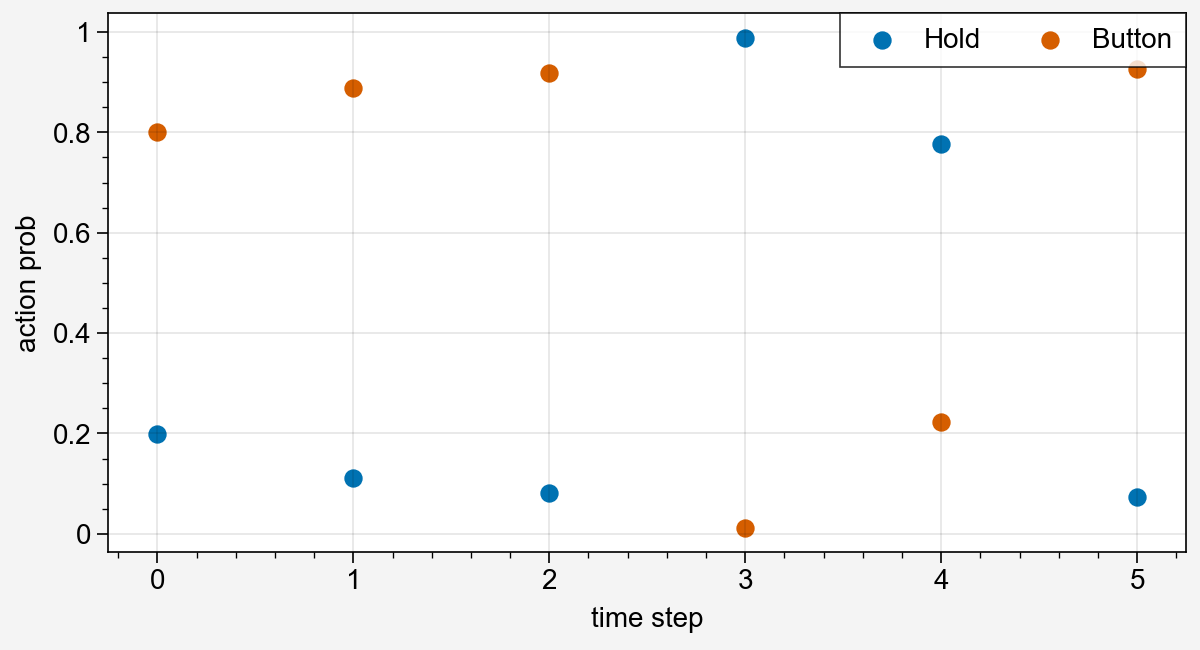

In [96]:
fig, ax = pplt.subplots(refaspect=2, figwidth=6)
ep = 0
aps = fres['action_probs'][ep]
labels = ['Hold', 'Button']
for i in range(2):
    ax.scatter(aps[:, i], label=labels[i])
ax.format(ylabel='action prob', xlabel='time step')
ax.legend()

# MetaBart

In [4]:
evalu = partial(forced_action_evaluate, data_callback=meta_bart_callback,
                env_name="BartMetaEnv", num_episodes=10)

c:\Users\14and\anaconda3\envs\bart\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.balloon_mean_sizes to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.balloon_mean_sizes` for environment variables or `env.get_wrapper_attr('balloon_mean_sizes')` that will search the reminding wrappers.
  logger.warn(


SubplotGrid(nrows=3, ncols=3, length=9)

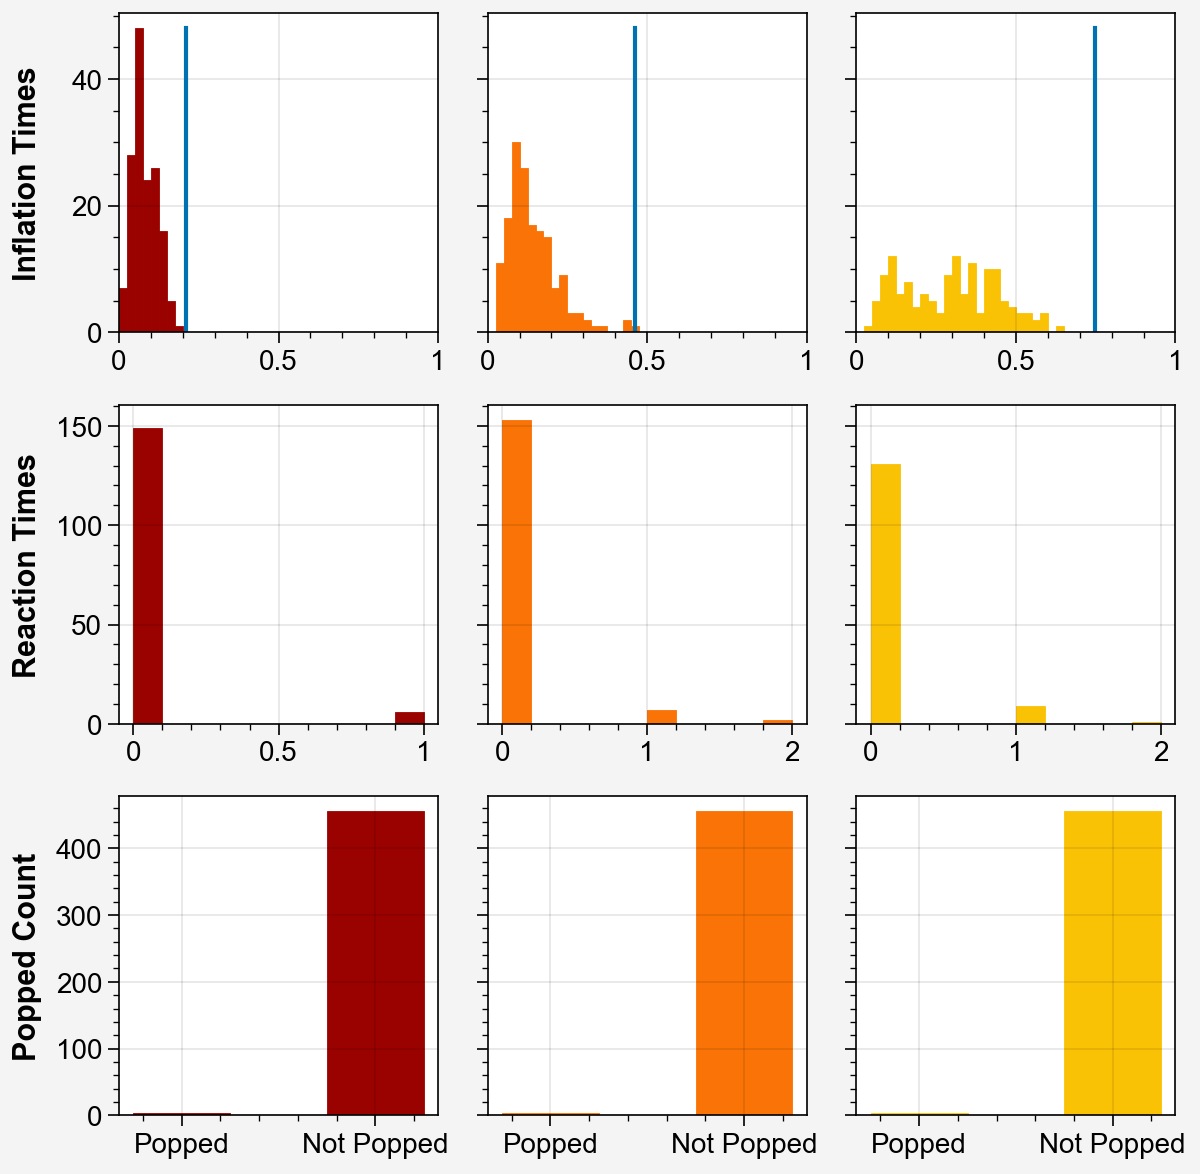

In [5]:
model, (obs_rms, ret_rms) = torch.load('../saved_checkpoints/meta/meta_t0/20.pt')
res = evalu(model, obs_rms, deterministic=False)
plot_3color_meta_ep(res, metrics=['size', 'rt', 'popped'], ep_num=3)

In [89]:
%run model_evaluation
%run bart_behavior_analysis

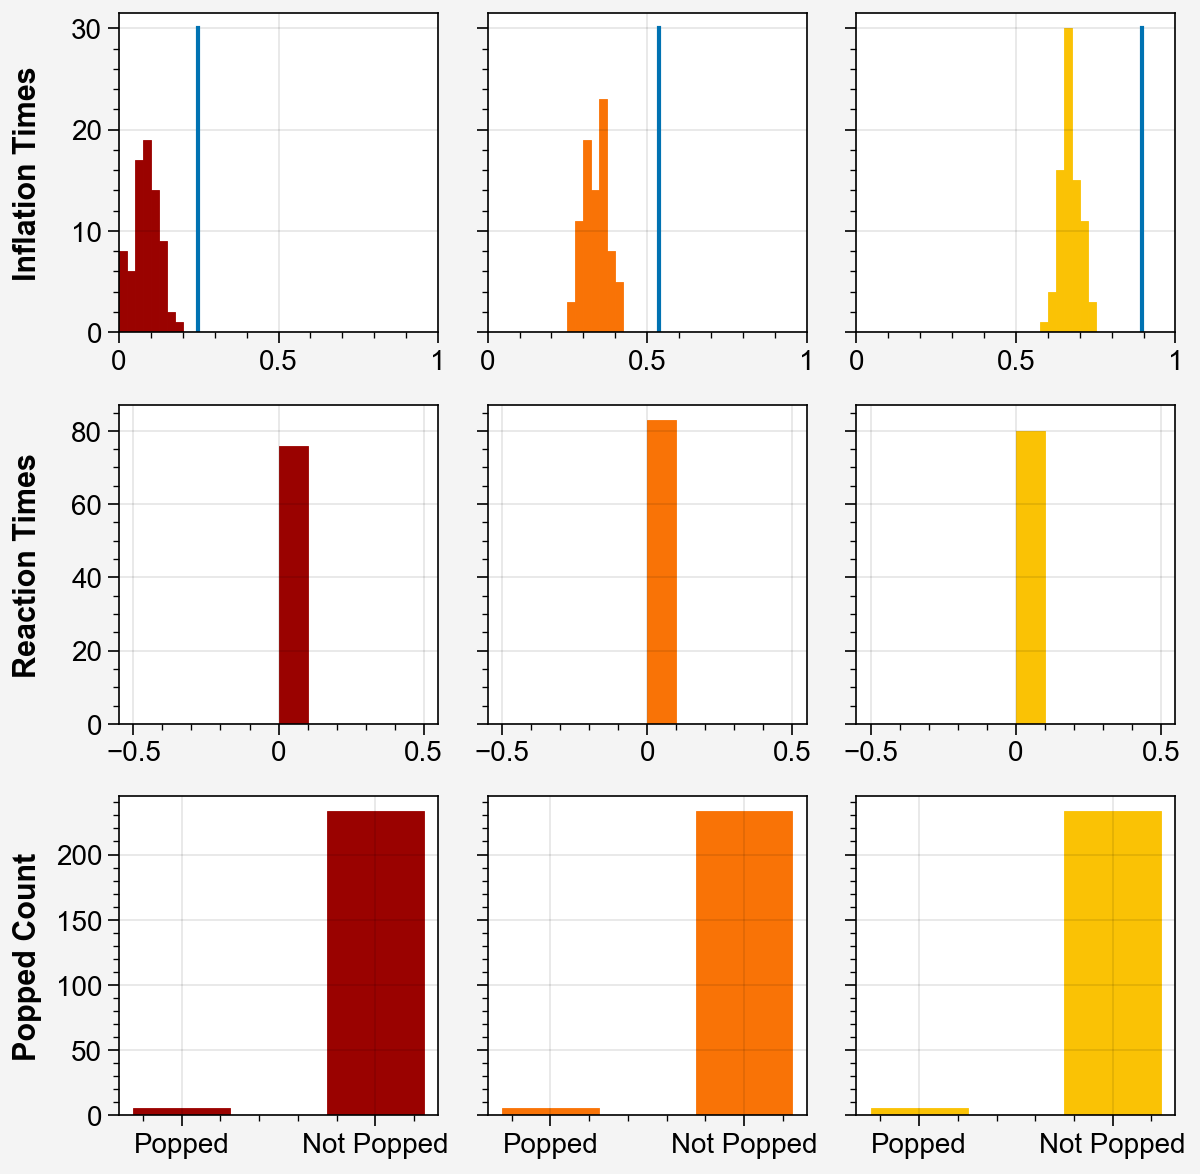

In [57]:
ax = plot_3color_meta_ep(res, metrics=['size', 'rt', 'popped'], ep_num=5)

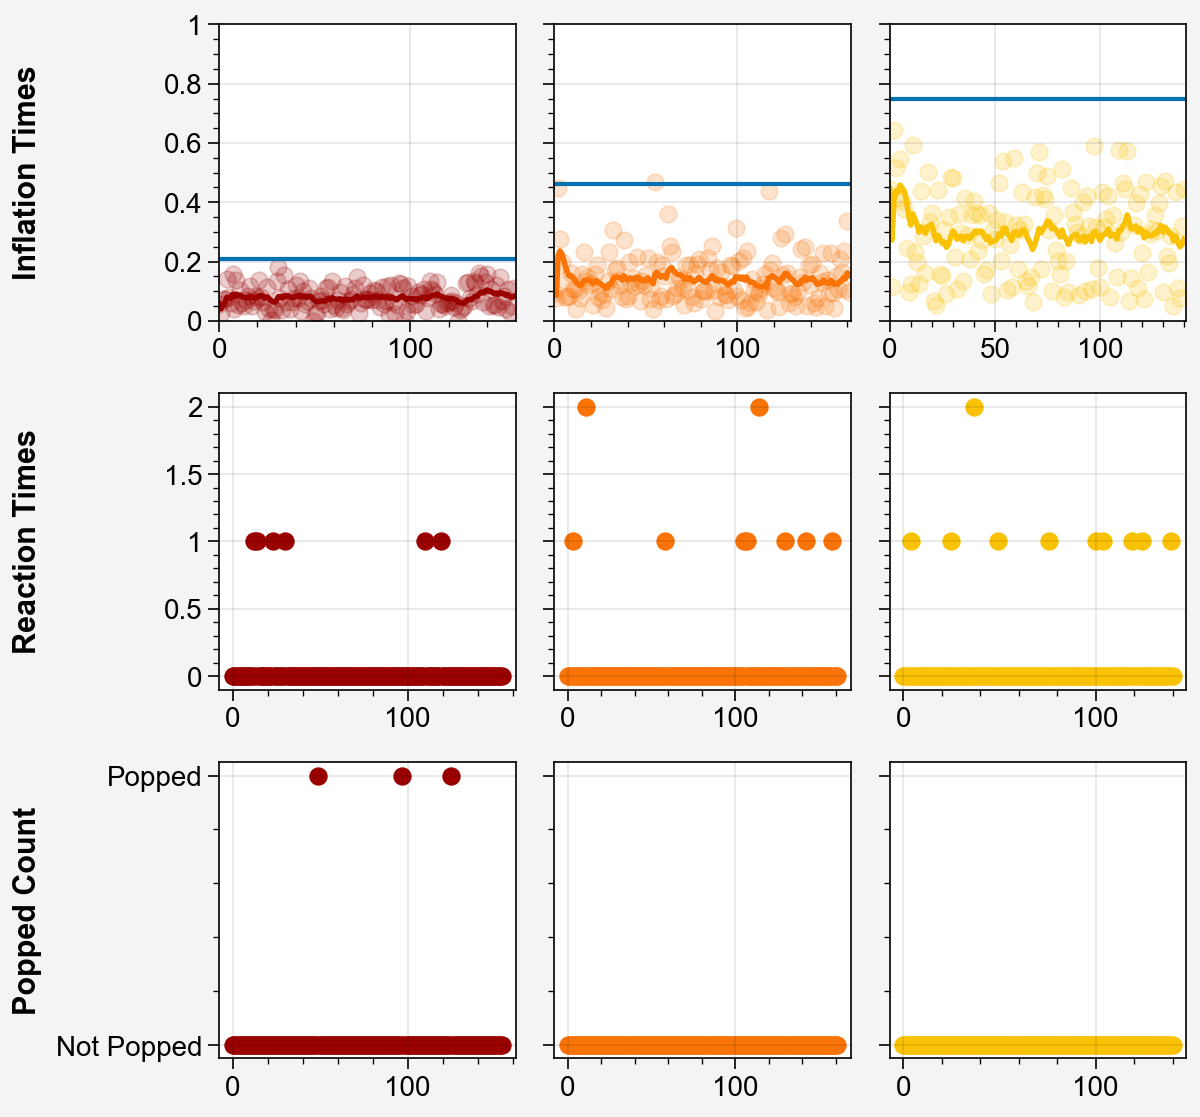

In [6]:
plot_meta_it_progression(res, ep_num=3)

In [12]:
get_meta_fixed_mean_diff(res)

(array([[7.42829308e-06, 5.33820361e-03, 1.30591643e-02],
        [4.26459043e-04, 7.98936107e-03, 4.92143319e-03],
        [9.39449060e-04, 2.89627655e-03, 1.22875047e-02],
        [2.59387336e-03, 5.08433395e-03, 8.93035688e-03],
        [4.50210229e-04, 1.04929368e-02, 4.70082610e-04],
        [2.46534532e-03, 1.69568167e-03, 6.96659255e-03],
        [1.34504173e-03, 8.35038998e-04, 1.65101404e-02],
        [1.20994802e-03, 1.20678714e-02, 8.29654365e-03],
        [1.79368965e-03, 3.27252756e-04, 1.62174541e-03],
        [1.79809772e-03, 1.66804640e-02, 1.95691162e-02]]),
 array([[0.07770655, 0.15063791, 0.2731473 ],
        [0.07814044, 0.15328907, 0.28128503],
        [0.07865343, 0.14240343, 0.29849397],
        [0.08030786, 0.14021537, 0.29513682],
        [0.07726377, 0.13480677, 0.28573639],
        [0.07524864, 0.14699539, 0.29317306],
        [0.07905902, 0.14446467, 0.30271661],
        [0.07892393, 0.13323183, 0.27790992],
        [0.07592029, 0.14497245, 0.28782821],
    

In [99]:
get_meta_mean_diffs(res)

[[0.12319768521367412, 0.3387447553956915, 0.44349704867664436],
 [0.21786687762352117, 0.35736654056798844, 0.7001731851242654],
 [0.29340278820606647, 0.2673542897617692, 0.597899249767421],
 [0.24789355246297406, 0.45756572095749415, 0.6719608061232168],
 [0.23011134547859252, 0.35037277191332517, 0.43643694977717434],
 [0.15016972982688903, 0.4142767557559584, 0.6507950591052309],
 [0.12593160419472815, 0.2914351724431029, 0.5696883954920192],
 [0.2441796241261885, 0.4000837446745097, 0.7041962928655492],
 [0.22126436012091666, 0.41735871138933833, 0.5495200273406163],
 [0.25403646739397767, 0.3915616134463631, 0.6159228142631152]]

In [65]:
ep_num = 5
colors = np.array(res['data']['current_color'][ep_num])
end_size = np.array(res['data']['last_size'][ep_num])
popped = np.array(res['data']['popped'][ep_num])

## Meta Uniform

In [13]:
%run bart_behavior_analysis
%run model_evaluation

In [21]:
evalu = partial(forced_action_evaluate, data_callback=meta_bart_callback,
                env_name="BartMetaEnv", num_episodes=10, env_kwargs={'meta_setup': 1, 'colors_used': 3})


c:\Users\14and\anaconda3\envs\bart\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.balloon_mean_sizes to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.balloon_mean_sizes` for environment variables or `env.get_wrapper_attr('balloon_mean_sizes')` that will search the reminding wrappers.
  logger.warn(


SubplotGrid(nrows=3, ncols=3, length=9)

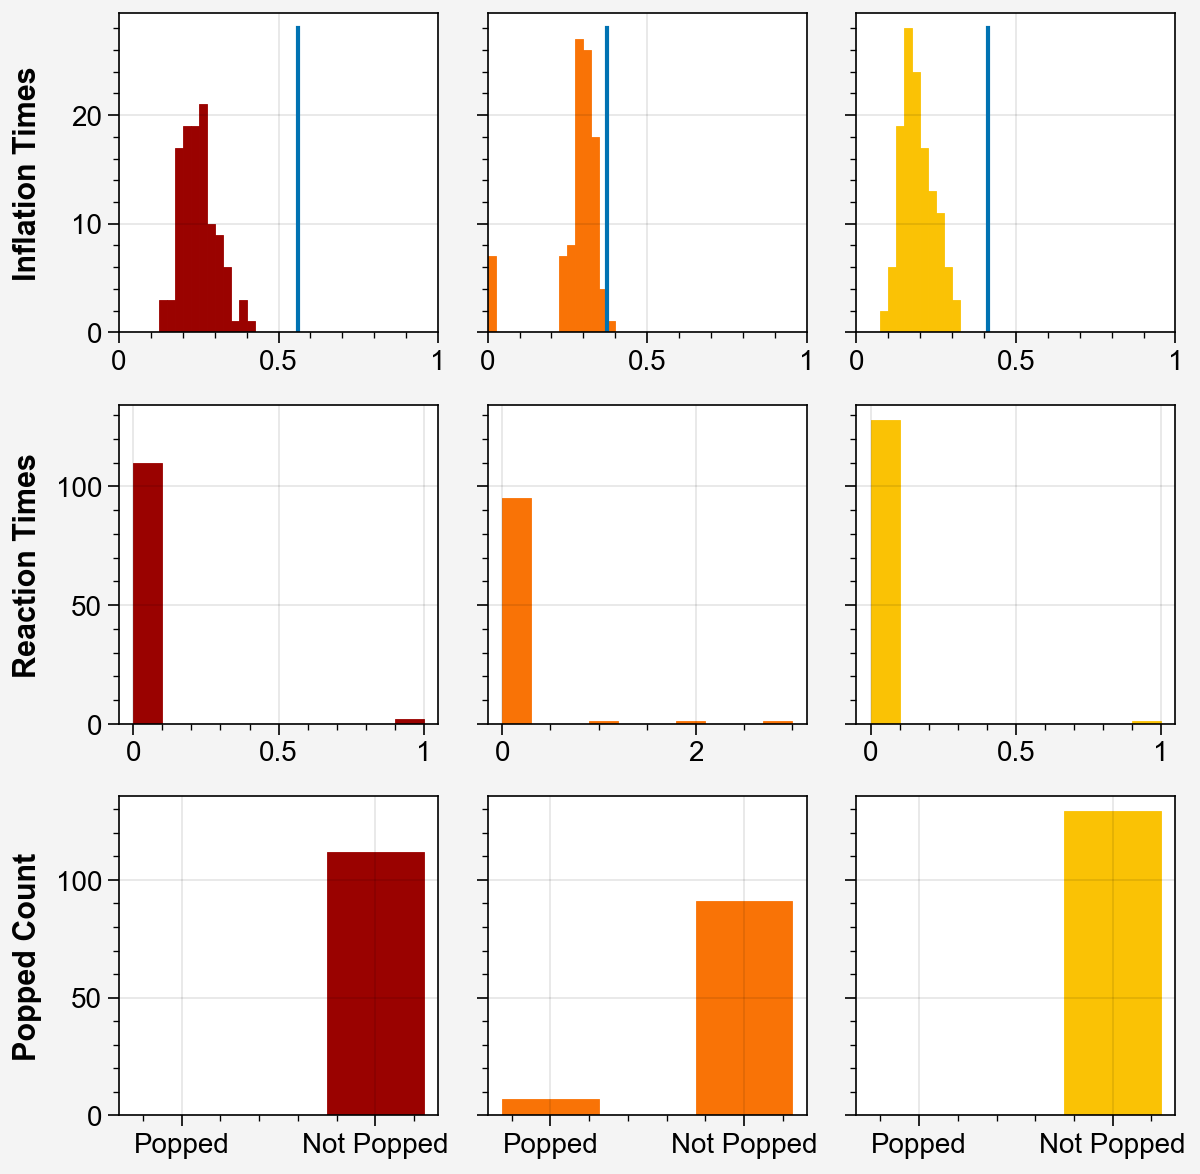

In [22]:
model, (obs_rms, ret_rms) = torch.load('../saved_checkpoints/meta/meta_uni_t0/240.pt')
res = evalu(model, obs_rms, deterministic=False, num_episodes=3)
plot_3color_meta_ep(res, metrics=['size', 'rt', 'popped'], ep_num=0)

In [25]:
get_meta_mean_diffs(res)

[[0.3139450482610835, 0.0702387373026429, 0.21996984848354498],
 [0.4768202124303781, 0.19055130411198568, 0.04267385241810673],
 [0.26186222312471374, 0.5684206355746897, 0.40784398117629783]]

In [26]:
get_meta_fixed_mean_diff(res)

(array([[0.01011688, 0.00338251, 0.01191204],
        [0.00719701, 0.00067905, 0.01290958],
        [0.00291987, 0.00270347, 0.00099754]]),
 array([[0.24850528, 0.30265016, 0.19160799],
        [0.23119139, 0.30671171, 0.16678637],
        [0.23546853, 0.30873613, 0.1806935 ]]))

In [29]:
env = gym.make('BartMetaEnv', colors_used=1)
env.reset()

AttributeError: 'BartMetaEnv' object has no attribute 'current_color_idx'

SubplotGrid(nrows=3, ncols=3, length=9)

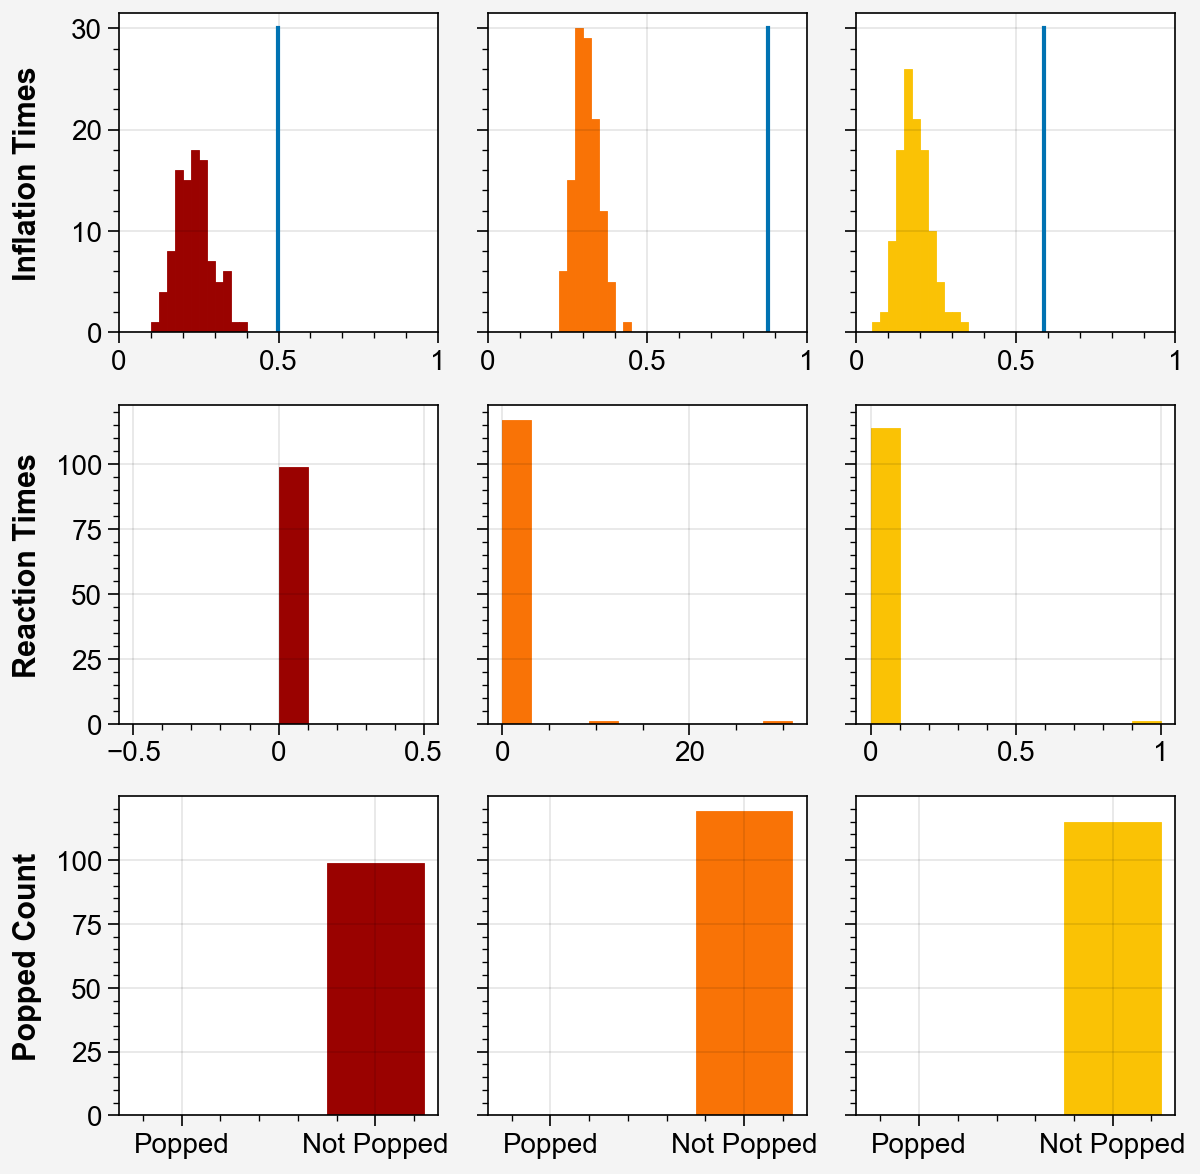

In [24]:

plot_3color_meta_ep(res, metrics=['size', 'rt', 'popped'], ep_num=2)

In [10]:
ep_num = 0
colors = np.array(res['data']['current_color'][ep_num])
end_size = np.array(res['data']['last_size'][ep_num])
popped = np.array(res['data']['popped'][ep_num])
limits = np.array(res['data']['balloon_limit'][ep_num])
means = res['data']['balloon_means'][ep_num]
